In [1]:
from src.pipeline import transformation as t
from src.pipeline import feature_engineering as fe
from src.pipeline import modeling_complete as e

In [7]:
from src.utils import utils as u
import pandas as pd

In [3]:
#path_origin = 'data/2020-02-02_.pkl'
path_origin = 'data/consecutive-inspections-2021-05-09.pkl'
path_pkl_clean= "pkl_clean.pkl"
path_fe = "fe_df.pkl"
path_models =  'model_exercise.pkl'
path_best_model =  'best_model.pkl'
path_features= 'features.pkl'
path_models = 'model_exercise.pkl'
path_metadata_models = 'models_metadata.pkl'
path_best_model = 'best_model.pkl'
path_metadata_best_model = 'metadata_best_model.pkl'

----------------------- Flujo completo desde la base original: --------------------------------------

In [9]:
# Carga de datos
df = pd.DataFrame(u.load_df(path_origin))

In [10]:
# Limpieza y tratamiento de datos 
df_clean = t.transform(df,path_pkl_clean )

Inicio proceso: Transformación y limpieza
Archivo 'pkl_transform.pkl' escrito correctamente
Finalizó proceso:  Transformación y limpieza


In [11]:
df_clean

,inspection_id,dba_name,facility_type,inspection_type,risk,zip,inspection_date,latitude,longitude,label
0,2501049,shark fish and chicken,restaurant,license,Risk 2 (Medium),60621,2021-05-03,41.780529,-87.642481,1
1,2501023,aramark educational services,school,canvass,Risk 1 (High),60643,2021-05-03,41.721194,-87.655777,0
2,2501053,reggio's pizza,restaurant,license,Risk 1 (High),60619,2021-05-03,41.738876,-87.605032,1
3,2501155,wilde,restaurant,canvass,Risk 1 (High),60657,2021-05-03,41.938589,-87.644497,0
4,2501038,ruggles,school,canvass re-inspection,Risk 1 (High),60619,2021-05-03,41.751947,-87.618030,0
...,...,...,...,...,...,...,...,...,...,...
697,2510058,protein bar,restaurant,canvass,Risk 1 (High),60614,2021-05-20,41.916550,-87.657165,1
698,2510071,greene nathaniel,school,canvass,Risk 1 (High),60609,2021-05-20,41.829664,-87.671456,1
699,2510005,allison's infant & toddler center,daycare above and under 2 years,license re-inspection,Risk 1 (High),60628,2021-05-20,41.685496,-87.616657,1
700,2510090,burger king #2654,restaurant,canvass,Risk 2 (Medium),60625,2021-05-21,41.968487,-87.690846,1


In [12]:
# Feature engineering
df_fe = fe.feature_engineering(df_clean,path_fe )

Inicio proceso: feature_engineering
Variables temporales creadas satisfactoriamente
Variables ciclicas creadas satisfactoriamente
Variables de distancia a centroides creadas satisfactoriamente
Limpieza y agrupacion de categorias creadas satisfactoriamente
Transformación OHE y escalamiento realizados satisfactoriamente
Creaciòn de tabla y renombre de columnas realizado satisfactoriamente
Features generados satisfactoriamente
Archivo 'pkl_fe.pkl' escrito correctamente
Finalizó proceso: Feature engineering


In [13]:
df_fe

,distance,distancia_ym_mht,distancia_ym,weekday,sin_day_no,cos_day_no,sin_week,cos_week,sin_month,cos_month,...,type_licuor,type_complaint,type_reinsp,type_illegal,type_not_ready,type_out_of_buss,type_prelicense,type_others,label,inspection_id
0,0.434974,0.391454,0.434974,1.0,0.974928,-0.222521,0.845596,-0.533823,0.5,-0.866025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2501049
1,0.651153,0.523694,0.651153,1.0,0.974928,-0.222521,0.845596,-0.533823,0.5,-0.866025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2501023
2,0.629060,0.618660,0.629060,1.0,0.974928,-0.222521,0.845596,-0.533823,0.5,-0.866025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2501053
3,0.156875,0.164372,0.156875,1.0,0.974928,-0.222521,0.845596,-0.533823,0.5,-0.866025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2501155
4,0.565182,0.543782,0.565182,1.0,0.974928,-0.222521,0.845596,-0.533823,0.5,-0.866025,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,2501038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,0.060309,0.064682,0.060309,1.0,-0.974928,-0.222521,0.696551,-0.717507,0.5,-0.866025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2510058
698,0.237189,0.181347,0.237189,1.0,-0.974928,-0.222521,0.696551,-0.717507,0.5,-0.866025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2510071
699,0.809070,0.738593,0.809070,1.0,-0.974928,-0.222521,0.696551,-0.717507,0.5,-0.866025,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,2510005
700,0.257196,0.242760,0.257196,1.0,-0.781831,0.623490,0.696551,-0.717507,0.5,-0.866025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2510090


In [15]:
# Modelos , seleccion de variables y metadata
models_features = e.training(df_fe, path_save_features= path_features , path_save_models = path_models,\
                             exercise=True)

Inicia proceso de entrenamiento de modelos
Se inicia el proceso de muestreo para ejercicio
Muestreo estratificado completado satisfactoriamente en  0.0957176685333252 segundos
Selección de variables completada satisfactoriamente en  7.373000621795654  segundos
Se concluye proceso de entrenamiento para ejercicio en  20.806796073913574  segundos


In [16]:
models_features['models']

[GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
              estimator=DecisionTreeClassifier(random_state=1111), n_jobs=-2,
              param_grid={'max_depth': [5, 10, 15],
                          'min_samples_leaf': [3, 5, 7]},
              scoring='precision'),
 GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
              estimator=RandomForestClassifier(oob_score=True,
                                               random_state=2222),
              n_jobs=-2,
              param_grid={'max_depth': [5, 10, 15],
                          'min_samples_leaf': [3, 5, 10],
                          'n_estimators': [30, 50, 100]},
              scoring='precision'),
 GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
              estimator=LogisticRegression(random_state=3333), n_jobs=-2,
              param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'penalty': ['l1', 'l

In [17]:
metadata_models = e.metadata_models(models_features['models'], fecha= 'hoy',\
                                       path_save_metadata= path_metadata_models)

In [18]:
# Seleccion del mejor modelo
best_model = e.best_model(models_features, save_best_path= path_best_model)

In [19]:
df_metadata_best_model = e. metadata_best_model(best_model['best_model'], fecha='hoy',\
                                                path_save=path_metadata_best_model )

AttributeError: 'DecisionTreeClassifier' object has no attribute 'base_estimator'

----------------------- Flujo completo desde la base original: --------------------------------------

In [13]:
# Si ya quieren cargar los PKL y no correr el proceso: 

# Carga de datos
pdf = u.load_df(path_origin)

# Limpieza y tratamiento de datos 
pdf_clean =  u.load_df(path_pkl_clean )

# Feature engineering
pdf_fe = u.load_df(path_fe )

# Modelos y seleccion de variables
pmodels = u.load_df(path_models )
pauto_variables   = u.load_df(path_features)        

# Seleccion del mejor modelo
pbest_model = u.load_df(path_best_model)

# Metadata
pdf_metadata_models =  u.load_df(path_metadata_models)
pdf_metadata_best_model =  u.load_df(path_metadata_models)                  

FileNotFoundError: [Errno 2] No such file or directory: 'features.pkl'

In [ ]:
# Se usaran: 
# best_model anterior 
# auto_variables

---------------------- EVALUACION ---------------------------------------

In [20]:
from src.utils import utils as u
from sklearn.metrics import precision_recall_curve , roc_auc_score, roc_curve, PrecisionRecallDisplay

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

In [21]:
best_model_1 = best_model['best_model']

In [22]:
X_train_id, X_test_id, y_train,y_test = e.train_test(df_fe )

predicted_labels = best_model_1.predict(X_test_id[models_features['features']])
predicted_scores = best_model_1.predict_proba(X_test_id[models_features['features']])

Se inicia el proceso de muestreo:train/test
Muestreo estratificado train/test completado satisfactoriamente en  0.007277250289916992


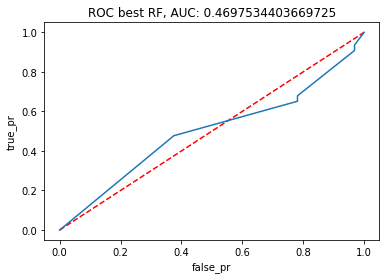

In [23]:
# Eligiendo el punto de corte con recall

fpr, tpr, thresholds_roc = roc_curve(y_test, predicted_scores[:,1], pos_label=1)

plt.clf()
plt.plot([0,1],[0,1], 'k--', c="red")
plt.plot(fpr, tpr)
plt.title("ROC best RF, AUC: {}".format(roc_auc_score(y_test, predicted_labels)))
plt.xlabel("false_pr")
plt.ylabel("true_pr")
plt.show()

In [24]:
# Punto de corte con recall
s1=pd.Series(thresholds_roc,name='threshold')
s2=pd.Series(fpr,name='false_pr')
s3=pd.Series(tpr ,name='true_pr')
df_threshold_roc = pd.concat([s1,s2,s3], axis=1)

recall = 0.8
threshold_recall = round(df_threshold_roc[df_threshold_roc.false_pr == df_threshold_roc[df_threshold_roc.true_pr >= recall ].false_pr.min()].threshold, 2).max()
print(df_threshold_roc, threshold_recall)

   threshold  false_pr   true_pr
0   2.000000   0.00000  0.000000
1   1.000000   0.37500  0.477064
2   0.833333   0.78125  0.651376
3   0.666667   0.78125  0.678899
4   0.625000   0.96875  0.908257
5   0.400000   0.96875  0.935780
6   0.000000   1.00000  1.000000 0.62


In [18]:
# # Eligiendo el punto de corte con  precision

# # Eligiendo el punto de corte
# prec, recall, t = precision_recall_curve(y_test, predicted_scores[:,1], pos_label=1)
# pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()


# # Punto de corte con precision

# precision = 0.6
# predict_proba = pd.DataFrame(predicted_scores[:,1])
# terminos_threshold = predict_proba > threshold

# score = terminos_threshold[0]
# score = score.replace(True,1).replace(False,0)
# score = score.to_numpy()

# s1=pd.Series(t,name='threshold')
# s2=pd.Series(prec,name='prec')
# s3=pd.Series(recall ,name='recall')
# df_threshold = pd.concat([s1,s2,s3], axis=1)

# precision = 0.6
# threshold = round(df_threshold[df_threshold.recall == df_threshold[prec > precision ].recall.max()].threshold, 2).max()
# threshold


In [25]:
# Resultados 
predict_proba = pd.DataFrame(predicted_scores[:,1])
terminos_threshold = predict_proba > threshold_recall

score = terminos_threshold[0]
score = score.replace(True,1).replace(False,0)
score = score.to_numpy()

results = pd.DataFrame(y_test)
results['score'] = score #cambio#########################

In [26]:
results_confusion_matrix =  pd.DataFrame(results[['label', 'score']].value_counts()).sort_values('label')
results_confusion_matrix

0
label score    
0     1.0    31
      0.0     1
1     1.0    99
      0.0    10

In [27]:
# Regresando a una sola columna el one hot encoding de la variable tipo de inspección
X_test_id['type_inspection_limpia'] = X_test_id[['type_canvass','type_license','type_licuor','type_complaint',
                                          'type_reinsp','type_illegal','type_not_ready','type_out_of_buss',
                                          'type_prelicense','type_others']].idxmax(axis=1) 

In [28]:
results_conjunto = pd.concat([results,X_test_id], axis=1)

In [29]:
df_clean_results = df_clean[['inspection_id', 'dba_name', 'facility_type', 'inspection_type']]
results_conjunto_original = results_conjunto.merge(df_clean_results, on='inspection_id', how='left')
results_conjunto_original.head(10)

,label,score,distance,distancia_ym_mht,distancia_ym,weekday,sin_day_no,cos_day_no,sin_week,cos_week,...,type_illegal,type_not_ready,type_out_of_buss,type_prelicense,type_others,inspection_id,type_inspection_limpia,dba_name,facility_type,inspection_type
0,0,1.0,0.148076,0.107976,0.148076,1.0,0.974928,-0.222521,0.776524,-0.630088,...,0.0,0.0,0.0,0.0,0.0,2509441,type_canvass,wow bao,restaurant,canvass
1,1,1.0,0.433309,0.388395,0.433309,1.0,-0.433884,-0.900969,0.845596,-0.533823,...,0.0,0.0,0.0,0.0,0.0,2501186,type_license,panda exress #3282,restaurant,license
2,1,1.0,0.111762,0.104164,0.111762,1.0,-0.433884,-0.900969,0.845596,-0.533823,...,0.0,0.0,0.0,0.0,0.0,2509212,type_canvass,halsted street deli,restaurant,canvass
3,1,1.0,0.285153,0.267550,0.285153,1.0,-0.433884,-0.900969,0.776524,-0.630088,...,0.0,0.0,0.0,0.0,0.0,2509601,type_canvass,jimmy's pizzeria and cafe,restaurant,canvass re-inspection
4,1,1.0,0.126786,0.103661,0.126786,1.0,-0.433884,-0.900969,0.696551,-0.717507,...,0.0,0.0,0.0,0.0,0.0,2509997,type_canvass,tao chicago,restaurant,canvass
5,1,1.0,0.305863,0.328313,0.305863,1.0,-0.974928,-0.222521,0.776524,-0.630088,...,0.0,0.0,0.0,0.0,0.0,2509693,type_canvass,emiliano zapata academy,school,canvass
6,1,1.0,0.380924,0.295073,0.380924,1.0,-0.974928,-0.222521,0.845596,-0.533823,...,0.0,0.0,0.0,0.0,0.0,2509273,type_complaint,56th street harold's grill and waffles,restaurant,complaint re-inspection
7,0,1.0,0.238216,0.180981,0.238216,1.0,-0.433884,-0.900969,0.776524,-0.630088,...,0.0,0.0,0.0,0.0,0.0,2509565,type_canvass,clark el ranchito corp,restaurant,canvass
8,0,1.0,0.468610,0.411876,0.468610,1.0,0.974928,-0.222521,0.696551,-0.717507,...,0.0,0.0,0.0,0.0,0.0,2509799,type_canvass,catalyst maria,school,canvass
9,1,1.0,0.078873,0.080954,0.078873,1.0,-0.974928,-0.222521,0.845596,-0.533823,...,0.0,0.0,0.0,0.0,0.0,2509301,type_canvass,rush day school,school,canvass


In [30]:
results_conjunto_original[results_conjunto_original.inspection_id==1960849]

,label,score,distance,distancia_ym_mht,distancia_ym,weekday,sin_day_no,cos_day_no,sin_week,cos_week,...,type_illegal,type_not_ready,type_out_of_buss,type_prelicense,type_others,inspection_id,type_inspection_limpia,dba_name,facility_type,inspection_type


In [32]:
filter_col = [col for col in results_conjunto_original if col.startswith('type')]
filter_col

['type_canvass',
 'type_license',
 'type_licuor',
 'type_complaint',
 'type_reinsp',
 'type_illegal',
 'type_not_ready',
 'type_out_of_buss',
 'type_prelicense',
 'type_others',
 'type_inspection_limpia']

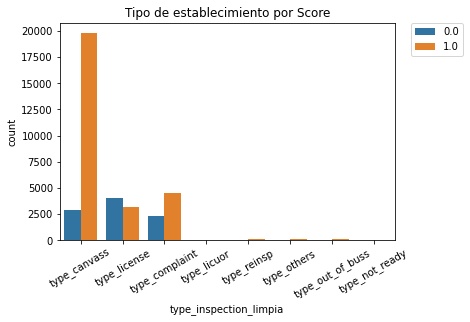

In [53]:
by_type = sns.countplot(x="type_inspection_limpia", hue="score",\
              data=results_conjunto_original)
by_type.set_xticklabels(by_type.get_xticklabels(), rotation=30);
plt.title('Tipo de establecimiento por Score', )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [36]:
results_conjunto_original[filter_col]

,type_canvass,type_license,type_licuor,type_complaint,type_reinsp,type_illegal,type_not_ready,type_out_of_buss,type_prelicense,type_others,type_inspection_limpia
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,type_canvass
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,type_canvass
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,type_canvass
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,type_canvass
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,type_canvass
...,...,...,...,...,...,...,...,...,...,...,...
37230,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,type_license
37231,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,type_complaint
37232,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,type_canvass
37233,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,type_canvass


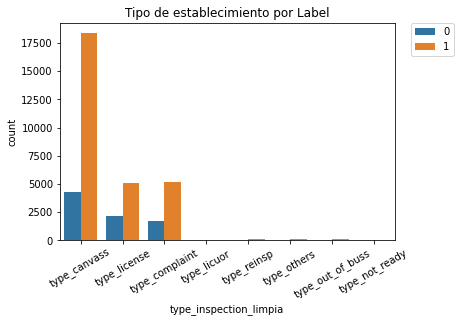

In [37]:
by_type = sns.countplot(x="type_inspection_limpia", hue="label",\
              data=results_conjunto_original)
by_type.set_xticklabels(by_type.get_xticklabels(), rotation=30);
plt.title('Tipo de establecimiento por Label', )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [39]:
prop_codigo = results_conjunto_original.groupby(['type_inspection_limpia'], as_index=False)['label']\
.count()\
.rename(columns={'label': 'count'})
prop_codigo['prop'] = prop_codigo['count']/np.sum(prop_codigo['count'])
prop_codigo.sort_values(by = ['prop'], ascending = False)

,type_inspection_limpia,count,prop
0,type_canvass,22663,0.608648
2,type_license,7201,0.193393
1,type_complaint,6890,0.185041
5,type_others,179,0.004807
6,type_out_of_buss,147,0.003948
7,type_reinsp,98,0.002632
3,type_licuor,56,0.001504
4,type_not_ready,1,0.000027


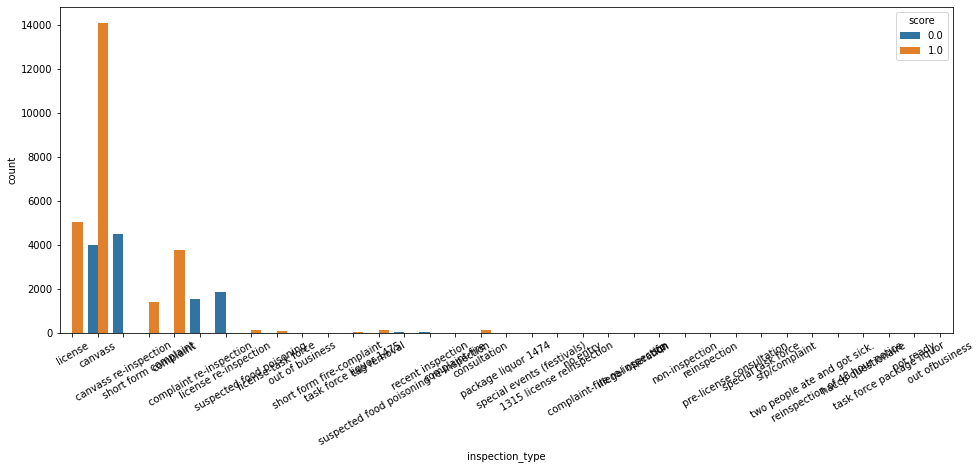

In [29]:
plt.figure(figsize=(16, 6))
by_type = sns.countplot(x="inspection_type", hue="score",\
              data=results_conjunto_original  )
by_type.set_xticklabels(by_type.get_xticklabels(), rotation=30);

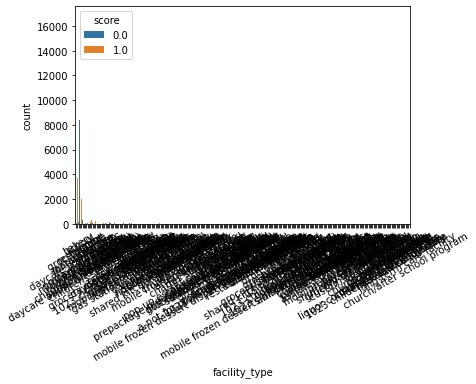

In [30]:

by_type = sns.countplot(x="facility_type", hue="score",\
              data=results_conjunto_original)
by_type.set_xticklabels(by_type.get_xticklabels(), rotation=30);

In [31]:
df = pd.DataFrame()
df['Communications and Search'] = [0.745763,0.333333,0.617021,0.435897,0.358974]
df['Business'] = ['Canvas','License','Re inspecccion','xxx','yyyy']
df['General'] = [0.118644,0.583333,0.297872,0.410256,0.410256]
df['Lifestyle'] = [0.084746,0.083333,0.042553,0.153846,0.153846]
df

,Communications and Search,Business,General,Lifestyle
0,0.745763,Canvas,0.118644,0.084746
1,0.333333,License,0.583333,0.083333
2,0.617021,Re inspecccion,0.297872,0.042553
3,0.435897,xxx,0.410256,0.153846
4,0.358974,yyyy,0.410256,0.153846


In [32]:
def limpieza_dic(palabra, lista_diccionario):
    
    laSuma=0
    for i in lista_diccionario: 
        laSuma = laSuma + (i in palabra)
    return laSuma

def clean_dummy(df):
        
    ############# DUMMY INSPECTION TYPE ##################
    dic_canvass = ['Canvas']    
    dic_license = ['License','tag removal','license task force / not -for-profit clu']    
    dic_licuor = ['task 1474','liquor','task force','taskforce','tavern 1470']      
    dic_complaint = ['complain','two people ate and got sick.']    
    dic_reinsp  = ['Re inspecccion','recent inspection','reinspection','recall inspection','re inspection',
                   'recently inspected','short form fire-complaint','changed court date','citation re-issued'] 
    dic_illegal = ['illegal operation']           
    dic_notready = ['not ready']        
    dic_outofbussines = ['out of business','consultation','no entry','business not located','out ofbusiness'] 
    dic_prelicense = ['pre-license consultation']
           
    df['type_canvass']=df['Business'].apply(lambda x: 1 if limpieza_dic(x,dic_canvass) >0  else 0)    
    df['type_license']=df['Business'].apply(lambda x: 1 if limpieza_dic(x,dic_license) >0  else 0)    
    df['type_licuor']=df['Business'].apply(lambda x: 1 if limpieza_dic(x,dic_licuor) >0  else 0)    
    df['type_complaint']=df['Business'].apply(lambda x: 1 if limpieza_dic(x,dic_complaint) >0  else 0)    
    df['type_reinsp']=df['Business'].apply(lambda x: 1 if limpieza_dic(x,dic_reinsp) >0  else 0)  
    df['type_illegal']=df['Business'].apply(lambda x: 1 if limpieza_dic(x,dic_illegal) >0  else 0)    
    df['type_not_ready']=df['Business'].apply(lambda x: 1 if limpieza_dic(x,dic_notready) >0  else 0)    
    df['type_out_of_buss']=df['Business'].apply(lambda x: 1 if limpieza_dic(x,dic_outofbussines) >0 else 0)
    df['type_prelicense']=df['Business'].apply(lambda x: 1 if limpieza_dic(x,dic_prelicense) >0  else 0)
        
    df['BandType'] = df[['type_canvass','type_license','type_licuor','type_complaint','type_reinsp',
                         'type_illegal','type_not_ready','type_out_of_buss','type_prelicense']].sum(axis=1)
    
    df['type_others'] = df['BandType'].apply(lambda x: 1 if x <1 else 0)    
    return df

In [33]:
df2 = clean_dummy(df)

In [34]:
df2

,Communications and Search,Business,General,Lifestyle,type_canvass,type_license,type_licuor,type_complaint,type_reinsp,type_illegal,type_not_ready,type_out_of_buss,type_prelicense,BandType,type_others
0,0.745763,Canvas,0.118644,0.084746,1,0,0,0,0,0,0,0,0,1,0
1,0.333333,License,0.583333,0.083333,0,1,0,0,0,0,0,0,0,1,0
2,0.617021,Re inspecccion,0.297872,0.042553,0,0,0,0,1,0,0,0,0,1,0
3,0.435897,xxx,0.410256,0.153846,0,0,0,0,0,0,0,0,0,0,1
4,0.358974,yyyy,0.410256,0.153846,0,0,0,0,0,0,0,0,0,0,1


In [40]:
### Aequitas
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
from aequitas.plotting import Plot
import time
import pandas as pd
import numpy as np

In [41]:
results_conjunto_original

,label,score,distance,distancia_ym_mht,distancia_ym,weekday,sin_day_no,cos_day_no,sin_week,cos_week,...,type_reinsp,type_illegal,type_not_ready,type_out_of_buss,type_prelicense,type_others,inspection_id,type_inspection_limpia,facility_type,inspection_type
0,1,1.0,0.163284,0.160200,0.157637,1.0,0.974928,-0.222521,-0.776524,-0.630088,...,0.0,0.0,0.0,0.0,0.0,0.0,1234743,type_license,daycare combo 1586,license
1,0,1.0,0.650907,0.628946,0.625240,1.0,-0.974928,-0.222521,0.812487,0.582979,...,0.0,0.0,0.0,0.0,0.0,0.0,1523045,type_canvass,grocery store,canvass
2,1,1.0,0.423075,0.378429,0.388322,1.0,0.433884,-0.900969,-0.902798,-0.430065,...,0.0,0.0,0.0,0.0,0.0,0.0,2386724,type_canvass,grocery store,canvass
3,1,1.0,0.316873,0.232122,0.299239,1.0,-0.781831,0.623490,0.812487,0.582979,...,0.0,0.0,0.0,0.0,0.0,0.0,1214898,type_canvass,grocery store,canvass
4,0,0.0,0.576486,0.529421,0.535264,1.0,0.974928,-0.222521,-0.926690,0.375828,...,1.0,0.0,0.0,0.0,0.0,0.0,1579116,type_canvass,grocery store,canvass re-inspection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37230,0,1.0,0.666080,0.503801,0.645425,1.0,0.974928,-0.222521,-0.999561,0.029633,...,0.0,0.0,0.0,0.0,0.0,0.0,2229287,type_complaint,restaurant,complaint
37231,1,0.0,0.110234,0.093156,0.090309,1.0,0.433884,-0.900969,0.176890,-0.984231,...,1.0,0.0,0.0,0.0,0.0,0.0,2373757,type_complaint,grocery store,complaint re-inspection
37232,0,0.0,0.166030,0.147733,0.145779,1.0,-0.433884,-0.900969,-0.292057,-0.956401,...,1.0,0.0,0.0,0.0,0.0,0.0,277588,type_canvass,restaurant,canvass re-inspection
37233,1,1.0,0.152024,0.113202,0.138507,1.0,0.433884,-0.900969,0.176890,-0.984231,...,0.0,0.0,0.0,0.0,0.0,0.0,1933167,type_license,children's services facility,license


In [41]:
df_s_i = results_conjunto_original[['score','label','type_inspection_limpia']]
df_s_i.rename(columns = {'label':'label_value'}, inplace = True)
df_s_i.head()

,score,label_value,type_inspection_limpia
0,1.0,1,type_canvass
1,1.0,0,type_canvass
2,1.0,1,type_canvass
3,1.0,1,type_canvass
4,1.0,1,type_canvass


# Group

In [42]:
g = Group()
xtab, attrbs = g.get_crosstabs(df_s_i)
xtab

model_id, score_thresholds 0 {'rank_abs': [27801]}


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,...,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev
0,0,binary 0/1,27801,type_inspection_limpia,type_canvass,0.907457,0.276487,0.588093,0.157480,0.723513,...,0.872523,3114,1699,1190,16660,18359,4304,22663,37235,0.810087
1,0,binary 0/1,27801,type_inspection_limpia,type_complaint,0.722670,0.535800,0.616894,0.171139,0.464200,...,0.659797,778,1446,898,3768,5214,1676,6890,37235,0.756749
2,0,binary 0/1,27801,type_inspection_limpia,type_license,0.560481,0.848471,0.553049,0.101674,0.151529,...,0.439800,322,2231,1803,2845,5076,2125,7201,37235,0.704902
3,0,binary 0/1,27801,type_inspection_limpia,type_licuor,0.800000,0.903226,0.151515,0.130435,0.096774,...,0.410714,3,5,28,20,25,31,56,37235,0.446429
4,0,binary 0/1,27801,type_inspection_limpia,type_not_ready,NaN,0.000000,NaN,1.000000,1.000000,...,1.000000,1,0,0,0,0,1,1,37235,0.000000
5,0,binary 0/1,27801,type_inspection_limpia,type_others,0.685039,0.576923,0.571429,0.201835,0.423077,...,0.608939,22,40,30,87,127,52,179,37235,0.709497
6,0,binary 0/1,27801,type_inspection_limpia,type_out_of_buss,0.684211,0.666667,0.620690,0.123596,0.333333,...,0.605442,11,36,22,78,114,33,147,37235,0.775510
7,0,binary 0/1,27801,type_inspection_limpia,type_reinsp,0.956522,0.333333,0.666667,0.043478,0.666667,...,0.938776,4,4,2,88,92,6,98,37235,0.938776


In [43]:
attrbs

Index(['type_inspection_limpia'], dtype='object')

In [44]:
list(xtab.columns)

['model_id',
 'score_threshold',
 'k',
 'attribute_name',
 'attribute_value',
 'tpr',
 'tnr',
 'for',
 'fdr',
 'fpr',
 'fnr',
 'npv',
 'precision',
 'pp',
 'pn',
 'ppr',
 'pprev',
 'fp',
 'fn',
 'tn',
 'tp',
 'group_label_pos',
 'group_label_neg',
 'group_size',
 'total_entities',
 'prev']

# Bias

In [45]:
bias = Bias()

In [46]:
bdf = bias.get_disparity_predefined_groups(xtab, original_df=df_s_i, 
                                           ref_groups_dict={'type_inspection_limpia':'type_canvass'}, 
                                           alpha=0.05)
bdf

get_disparity_predefined_group()


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,...,ppr_ref_group_value,pprev_ref_group_value,precision_ref_group_value,fdr_ref_group_value,for_ref_group_value,fpr_ref_group_value,fnr_ref_group_value,tpr_ref_group_value,tnr_ref_group_value,npv_ref_group_value
0,0,binary 0/1,27801,type_inspection_limpia,type_canvass,0.907457,0.276487,0.588093,0.157480,0.723513,...,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass
1,0,binary 0/1,27801,type_inspection_limpia,type_complaint,0.722670,0.535800,0.616894,0.171139,0.464200,...,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass
2,0,binary 0/1,27801,type_inspection_limpia,type_license,0.560481,0.848471,0.553049,0.101674,0.151529,...,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass
3,0,binary 0/1,27801,type_inspection_limpia,type_licuor,0.800000,0.903226,0.151515,0.130435,0.096774,...,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass
4,0,binary 0/1,27801,type_inspection_limpia,type_not_ready,NaN,0.000000,NaN,1.000000,1.000000,...,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass
5,0,binary 0/1,27801,type_inspection_limpia,type_others,0.685039,0.576923,0.571429,0.201835,0.423077,...,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass
6,0,binary 0/1,27801,type_inspection_limpia,type_out_of_buss,0.684211,0.666667,0.620690,0.123596,0.333333,...,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass
7,0,binary 0/1,27801,type_inspection_limpia,type_reinsp,0.956522,0.333333,0.666667,0.043478,0.666667,...,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass,type_canvass


In [47]:
list(bdf.columns)

['model_id',
 'score_threshold',
 'k',
 'attribute_name',
 'attribute_value',
 'tpr',
 'tnr',
 'for',
 'fdr',
 'fpr',
 'fnr',
 'npv',
 'precision',
 'pp',
 'pn',
 'ppr',
 'pprev',
 'fp',
 'fn',
 'tn',
 'tp',
 'group_label_pos',
 'group_label_neg',
 'group_size',
 'total_entities',
 'prev',
 'ppr_disparity',
 'pprev_disparity',
 'precision_disparity',
 'fdr_disparity',
 'for_disparity',
 'fpr_disparity',
 'fnr_disparity',
 'tpr_disparity',
 'tnr_disparity',
 'npv_disparity',
 'ppr_ref_group_value',
 'pprev_ref_group_value',
 'precision_ref_group_value',
 'fdr_ref_group_value',
 'for_ref_group_value',
 'fpr_ref_group_value',
 'fnr_ref_group_value',
 'tpr_ref_group_value',
 'tnr_ref_group_value',
 'npv_ref_group_value']

In [48]:
fair = Fairness()

In [49]:
fdf = fair.get_group_value_fairness(bdf)

In [50]:
fdf

,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,...,FNR Parity,TPR Parity,TNR Parity,NPV Parity,Precision Parity,TypeI Parity,TypeII Parity,Equalized Odds,Unsupervised Fairness,Supervised Fairness
0,0,binary 0/1,27801,type_inspection_limpia,type_canvass,0.907457,0.276487,0.588093,0.157480,0.723513,...,True,True,True,True,True,True,True,True,True,True
1,0,binary 0/1,27801,type_inspection_limpia,type_complaint,0.722670,0.535800,0.616894,0.171139,0.464200,...,False,False,False,True,True,False,False,False,False,False
2,0,binary 0/1,27801,type_inspection_limpia,type_license,0.560481,0.848471,0.553049,0.101674,0.151529,...,False,False,False,True,True,False,False,False,False,False
3,0,binary 0/1,27801,type_inspection_limpia,type_licuor,0.800000,0.903226,0.151515,0.130435,0.096774,...,False,True,False,False,True,False,False,False,False,False
4,0,binary 0/1,27801,type_inspection_limpia,type_not_ready,NaN,0.000000,NaN,1.000000,1.000000,...,NaN,NaN,False,NaN,False,False,NaN,False,False,False
5,0,binary 0/1,27801,type_inspection_limpia,type_others,0.685039,0.576923,0.571429,0.201835,0.423077,...,False,False,False,True,True,False,False,False,False,False
6,0,binary 0/1,27801,type_inspection_limpia,type_out_of_buss,0.684211,0.666667,0.620690,0.123596,0.333333,...,False,False,False,True,True,False,False,False,False,False
7,0,binary 0/1,27801,type_inspection_limpia,type_reinsp,0.956522,0.333333,0.666667,0.043478,0.666667,...,False,True,True,True,True,False,False,True,False,False


In [51]:
list(fdf.columns)

['model_id',
 'score_threshold',
 'k',
 'attribute_name',
 'attribute_value',
 'tpr',
 'tnr',
 'for',
 'fdr',
 'fpr',
 'fnr',
 'npv',
 'precision',
 'pp',
 'pn',
 'ppr',
 'pprev',
 'fp',
 'fn',
 'tn',
 'tp',
 'group_label_pos',
 'group_label_neg',
 'group_size',
 'total_entities',
 'prev',
 'ppr_disparity',
 'pprev_disparity',
 'precision_disparity',
 'fdr_disparity',
 'for_disparity',
 'fpr_disparity',
 'fnr_disparity',
 'tpr_disparity',
 'tnr_disparity',
 'npv_disparity',
 'ppr_ref_group_value',
 'pprev_ref_group_value',
 'precision_ref_group_value',
 'fdr_ref_group_value',
 'for_ref_group_value',
 'fpr_ref_group_value',
 'fnr_ref_group_value',
 'tpr_ref_group_value',
 'tnr_ref_group_value',
 'npv_ref_group_value',
 'Statistical Parity',
 'Impact Parity',
 'FDR Parity',
 'FPR Parity',
 'FOR Parity',
 'FNR Parity',
 'TPR Parity',
 'TNR Parity',
 'NPV Parity',
 'Precision Parity',
 'TypeI Parity',
 'TypeII Parity',
 'Equalized Odds',
 'Unsupervised Fairness',
 'Supervised Fairness']

In [52]:
parity_determinations = fair.list_parities(fdf)
parity_determinations

['Precision Parity',
 'TypeI Parity',
 'TNR Parity',
 'FDR Parity',
 'FPR Parity',
 'Equalized Odds',
 'Statistical Parity',
 'TPR Parity',
 'Supervised Fairness',
 'NPV Parity',
 'Impact Parity',
 'Unsupervised Fairness',
 'FOR Parity',
 'TypeII Parity',
 'FNR Parity']

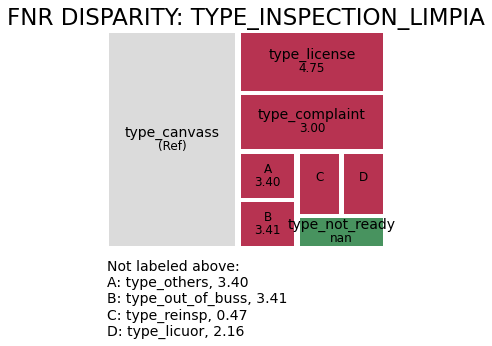

In [56]:
aeq = Plot()
m = aeq.plot_fairness_disparity(fdf, group_metric='fnr', attribute_name='type_inspection_limpia')